# Data preparation and Model Builing

In [5]:
# import torch for training the model, checking the GPU capability as well
import torch
print(torch.cuda.is_available())

In [6]:
# detecto was the package used for logo detection, which is based on tensor flow and uses the faster R CNN model by default

from detecto import core, utils, visualize
from PIL import Image

True


In [4]:
# loadinig the dataset for training
dataset = core.Dataset('images/')
# creating the model object by specofying the label to be trained, here allianz as label
# we can also provide a list of label as well, which are annotated in the training image
model = core.Model(['allianz'])

In [5]:
# train the model, took approximately 23 mins to train with the GPU.

model.fit(dataset, epochs= 10, learning_rate= 0.001)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:25<00:00,  3.10s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:17<00:00,  2.94s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:18<00:00,  2.94s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:17<00:00,  2.94s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:18<00:00,  2.94s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:18<00:00,  2.94s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:18<00:00,  2.94s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:17<00:00,  2.94s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:18<00:00,  2.94s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 47/47 [02:17<00:00,  2.93s/it]


In [9]:
# mode check
# Specify the path to your image
image = utils.read_image('images/test5.jpg')
predictions = model.predict(image)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['allianz']
print(labels) 

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)

['allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz', 'allianz']
tensor([[228.4523,   8.2917, 425.6527,  83.1212],
        [449.0395,   9.5161, 643.6880,  83.1867],
        [267.6781,   0.0000, 581.6693,  88.6683],
        [389.6207,   2.9508, 545.0032,  93.5523],
        [303.4595,  16.9962, 497.8443,  86.7702],
        [165.3521,   0.0000, 487.5022,  71.3402],
        [365.5654,   0.0000, 700.1583,  69.5043],
        [533.5732,   6.4515, 752.8038,  86.1423],
        [172.4464,  21.8105, 382.8956,  78.2554],
        [524.0308, 113.1902, 730.2908, 182.0728],
        [ 77.8872,   4.6681, 417.0754, 349.7533],
        [144.7453,   4.6077, 658.9041, 310.9583],
        [425.1151,   4.4171, 735.3177, 358.4688

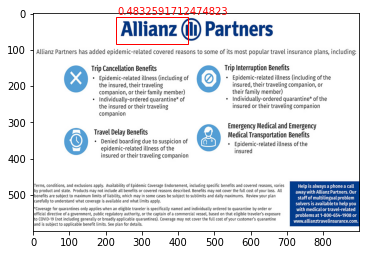

In [10]:
# visulizing the labels in a test image
# predicted points with highest score value is selected for the visualization

visualize.show_labeled_image(image, boxes[0], scores[0])

In [8]:
# save the model 

model.save'model_weights.pth'()

# later the model can be reuesed with the below code

model = core.Model.load('model_weights.pth', ['allianz'])

In [21]:
# image cropping 
x,y,w,h = boxes[0

# saving the cropped image
Image.open('images/test5.jpg').crop((float(x), float(y), float(w), float(h))).save('output/img.jpg')]